In [1]:
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd
from pycaret.classification import *

In [2]:
credentials = service_account.Credentials.from_service_account_file(
'employeechurn-425407-5e56293b7a73.json')

project_id = 'employeechurn-425407'
client = bigquery.Client(credentials= credentials,project=project_id)

In [3]:
dataset_ref=client.dataset('employeechurndataset')
dataset=client.get_dataset(dataset_ref)
dataset.dataset_id

'employeechurndataset'

In [4]:
tables= client.list_tables(dataset.dataset_id)
table_dict={}
for table in tables:
    table_ref=dataset.table(table.table_id)
    data=client.get_table(table_ref)
    if not data.table_id == 'full_employee_data':
        table_dict[table.table_id] = client.list_rows(data).to_dataframe()
    else:
        sql= \
        """
        SELECT * FROM `employeechurn-425407.employeechurndataset.full_employee_data`

        """
    
        table_dict[table.table_id] = client.query_and_wait(sql).to_dataframe()



In [5]:
full_df=table_dict['full_employee_data']
pilot_df=table_dict['tbl_new_employees']
original_df=table_dict['tbl_hr_data']

In [6]:
pilot_df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Quit_the_Company,promotion_last_5years,Departments,salary,employee_id
0,0.331690,0.847953,6,151,4,0,0,0,IT,low,NE15014
1,0.468434,0.169659,5,303,4,0,0,0,IT,low,NE15015
2,0.858448,0.918311,4,162,6,1,0,0,IT,low,NE15064
3,0.056211,0.322600,2,229,5,1,0,0,IT,low,NE15086
4,0.382648,0.434348,4,260,3,1,0,0,hr,low,NE15021
5,0.887892,0.824672,4,245,3,1,0,0,hr,low,NE15099
6,0.827268,0.779616,7,224,2,0,0,0,sales,low,NE15034
7,0.627046,0.160653,2,227,10,1,0,0,sales,low,NE15038
8,0.205280,0.616096,6,153,3,1,0,1,sales,low,NE15059
9,0.706510,0.257276,4,193,3,0,0,0,sales,low,NE15101


In [7]:
setup(data=original_df,target='Quit_the_Company',
        session_id= 123,
        categorical_features=['Departments','salary'],
        ignore_features=['employee_id']
        )

,Description,Value
0,Session id,123
1,Target,Quit_the_Company
2,Target type,Binary
3,Original data shape,"(15004, 11)"
4,Transformed data shape,"(15004, 21)"
5,Transformed train set shape,"(10502, 21)"
6,Transformed test set shape,"(4502, 21)"
7,Ignore features,1
8,Numeric features,7
9,Categorical features,2


In [8]:
compare_models()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [9]:
rf_model=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9914,0.9946,0.9681,0.9959,0.9818,0.9762,0.9764
1,0.9933,0.9900,0.9721,1.0000,0.9859,0.9815,0.9817
2,0.9895,0.9930,0.9680,0.9878,0.9778,0.9709,0.9710
3,0.9857,0.9923,0.9520,0.9876,0.9695,0.9601,0.9604
4,0.9895,0.9890,0.9600,0.9959,0.9776,0.9708,0.9710
5,0.9886,0.9921,0.9560,0.9958,0.9755,0.9681,0.9684
6,0.9886,0.9936,0.9560,0.9958,0.9755,0.9681,0.9684
7,0.9819,0.9863,0.9440,0.9793,0.9613,0.9495,0.9498
8,0.9857,0.9885,0.9440,0.9958,0.9692,0.9599,0.9605


In [10]:
final_df=predict_model(rf_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9904,0.9909,0.9664,0.9933,0.9797,0.9734,0.9736


In [11]:
final_df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,Quit_the_Company,prediction_label,prediction_score
6949,0.42,0.56,2,143,3,0,0,support,medium,1,1,1.00
3760,0.62,0.52,3,148,3,0,0,sales,medium,0,0,1.00
3460,0.37,0.45,2,149,3,0,0,sales,low,1,1,1.00
5785,0.78,0.98,5,263,6,0,0,sales,low,1,1,1.00
697,0.36,0.62,4,111,6,0,0,IT,low,0,0,0.97
8488,0.76,0.90,4,263,5,0,0,support,low,1,1,1.00
3836,0.74,0.56,3,203,3,0,0,sales,low,0,0,0.98
9328,0.99,0.69,3,206,2,0,0,marketing,medium,0,0,1.00
7520,0.96,0.54,3,198,3,0,0,support,low,0,0,1.00
14832,0.94,0.80,5,245,3,1,0,product_mng,medium,0,0,0.99


In [12]:
new_predictions=predict_model(rf_model, pilot_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9300,0,0.0000,0.0000,0.0000,0.0000,0.0000


In [13]:
new_predictions.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,employee_id,Quit_the_Company,prediction_label,prediction_score
0,0.331690,0.847953,6,151,4,0,0,IT,low,NE15014,0,0,0.82
1,0.468434,0.169659,5,303,4,0,0,IT,low,NE15015,0,1,0.52
2,0.858448,0.918311,4,162,6,1,0,IT,low,NE15064,0,0,0.82
3,0.056211,0.322600,2,229,5,1,0,IT,low,NE15086,0,0,0.64
4,0.382648,0.434348,4,260,3,1,0,hr,low,NE15021,0,0,0.91
5,0.887892,0.824672,4,245,3,1,0,hr,low,NE15099,0,0,0.94
6,0.827268,0.779616,7,224,2,0,0,sales,low,NE15034,0,0,0.67
7,0.627046,0.160653,2,227,10,1,0,sales,low,NE15038,0,0,0.99
8,0.205280,0.616096,6,153,3,1,1,sales,low,NE15059,0,0,0.92
9,0.706510,0.257276,4,193,3,0,0,sales,low,NE15101,0,0,1.00


In [15]:
new_predictions.to_gbq('employeechurndataset.pilot_predictions',
                       project_id=project_id,
                       chunksize=None,
                       if_exists='replace')

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=hAnPfSCoWI04mzydxtzG39J7NviGp3&prompt=consent&access_type=offline


100%|██████████| 1/1 [00:00<?, ?it/s]


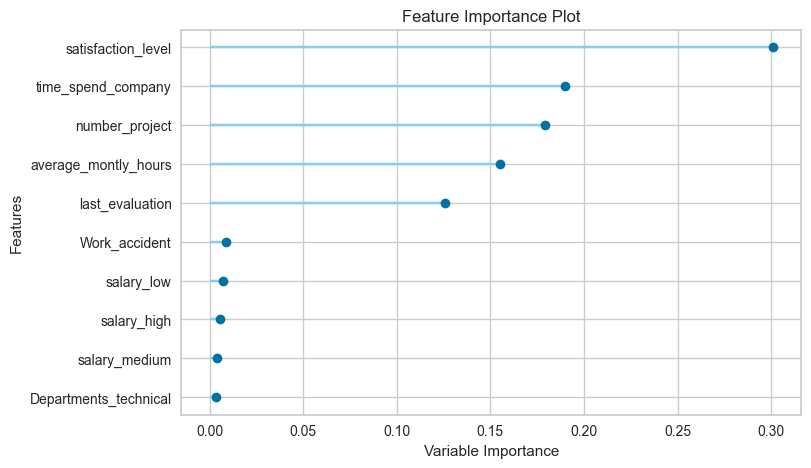

In [16]:
plot_model(rf_model, plot='feature')

In [17]:
rf_model.feature_names_in_

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments_accounting',
       'Departments_support', 'Departments_technical',
       'Departments_sales', 'Departments_RandD', 'Departments_IT',
       'Departments_hr', 'Departments_product_mng',
       'Departments_marketing', 'Departments_management', 'salary_medium',
       'salary_low', 'salary_high'], dtype=object)

In [18]:
rf_model.feature_importances_

array([0.30110658, 0.1259243 , 0.17920058, 0.15511409, 0.18978115,
       0.0088762 , 0.0015364 , 0.00194865, 0.00290416, 0.00367545,
       0.00352838, 0.00186797, 0.00168919, 0.00183491, 0.00148181,
       0.00135336, 0.00152958, 0.00396984, 0.00693197, 0.00574544])

In [19]:
feature_table=pd.DataFrame(zip(rf_model.feature_names_in_, rf_model.feature_importances_),columns=['feature','importance'])

In [20]:
feature_table

,feature,importance
0,satisfaction_level,0.301107
1,last_evaluation,0.125924
2,number_project,0.179201
3,average_montly_hours,0.155114
4,time_spend_company,0.189781
5,Work_accident,0.008876
6,promotion_last_5years,0.001536
7,Departments_accounting,0.001949
8,Departments_support,0.002904
9,Departments_technical,0.003675


In [21]:
feature_table.to_gbq('employeechurndataset.feature_table',
                       project_id=project_id,
                       chunksize=None,
                       if_exists='replace')

100%|██████████| 1/1 [00:00<?, ?it/s]
